Notebook Overview

- Perceptron Model
- Neural Networks
- Keras Basics for Regression Task
- Reccurent Neural Networks
- LSTM and GRU Neurons - Long Short Term Memory units; Gated Reccurring Units
- Time Series Forecasting with RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
%matplotlib inline

## y = mx + b + noise

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [3]:
np.random.seed(101)
noise = np.random.normal(loc=0,scale=4,size=len(x))

In [4]:
y = 2*x + b + noise
y

array([ 13.82739936,   6.52263185,   8.65207981,   8.04560605,
         9.64487583,   6.77323287,   5.66829813,  12.49456847,
         3.0081351 ,  15.05139732,  15.21626408,  11.75510898,
        15.87599336,  13.09582491,  13.40846528,  21.97174119,
        19.92479345,  28.08674647,  31.6056873 ,  24.92595473,
        24.412682  ,  30.98701291,  18.3978785 ,  21.59584557,
        26.70306136,  29.81463662,  29.93024481,  31.01073471,
        34.51365194,  32.58476799,  35.85817836,  35.63171651,
        33.33481623,  33.31705453,  33.56980873,  40.29254194,
        38.8965431 ,  47.98075655,  42.33634622,  50.38054854,
        39.4309864 ,  45.20133943,  40.87766405,  46.43580935,
        51.54838105,  47.82815384,  49.33832989,  53.07405081,
        60.10423426,  50.05391407,  50.48374915,  53.1294775 ,
        56.11335961,  54.61756138,  59.78053217,  62.65479667,
        55.86215953,  68.02721413,  57.05058994,  65.03787123,
        65.15018185,  72.95223574,  64.12018793,  67.55

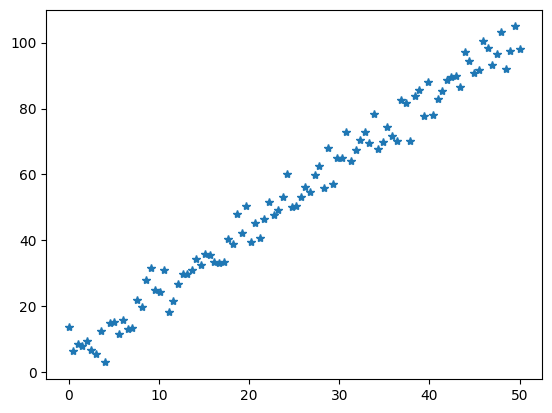

In [5]:
plt.plot(x,y,'*')

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(4, input_dim=1,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x,y,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 3118.0066
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 3088.5930
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 3059.2480
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 3028.7666
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 2999.3784
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 2969.9719
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 2940.3054
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 2910.4341
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 2881.3604
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 2852.7202
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 2823.9226
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 2794.3140
Epoch 13/200
4/4 [=======

In [10]:
model.history.history['loss']

[3118.006591796875,
 3088.593017578125,
 3059.248046875,
 3028.7666015625,
 2999.37841796875,
 2969.971923828125,
 2940.305419921875,
 2910.43408203125,
 2881.3603515625,
 2852.72021484375,
 2823.922607421875,
 2794.31396484375,
 2765.84814453125,
 2735.510009765625,
 2705.349365234375,
 2674.0966796875,
 2643.82958984375,
 2613.760986328125,
 2581.2529296875,
 2550.832763671875,
 2519.43505859375,
 2490.059326171875,
 2459.859619140625,
 2428.7294921875,
 2396.927001953125,
 2367.617919921875,
 2336.719970703125,
 2304.67724609375,
 2273.675048828125,
 2242.9482421875,
 2212.478759765625,
 2181.726318359375,
 2153.284912109375,
 2123.87744140625,
 2094.427978515625,
 2065.3486328125,
 2035.2685546875,
 2002.8013916015625,
 1972.7186279296875,
 1940.61181640625,
 1910.3402099609375,
 1880.1971435546875,
 1848.3065185546875,
 1817.740966796875,
 1787.1099853515625,
 1755.138427734375,
 1724.0799560546875,
 1692.8477783203125,
 1660.46240234375,
 1628.1513671875,
 1596.7677001953125,
 15

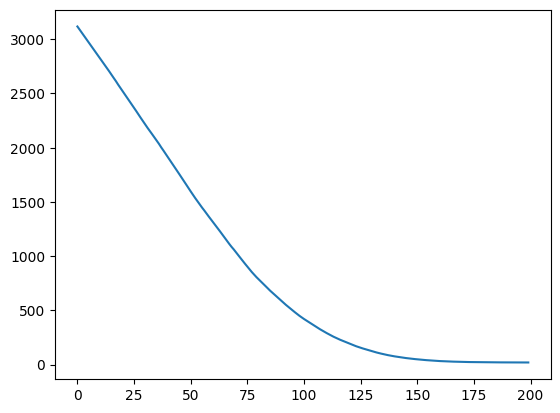

In [11]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [13]:
x_for_preds = np.linspace(0,50,100)

y_pred = model.predict(x_for_preds)

4/4 [==============================] - 0s 3ms/step


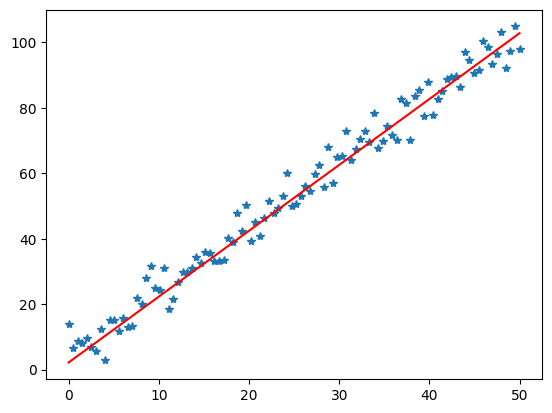

In [15]:
plt.plot(x,y,'*')
plt.plot(x_for_preds,y_pred,'r')

In [16]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,y_pred)

18.706897055552272

Recurrent Neural Networks

Recurrent neural networks are specifically designed to work with sequence data.

Example of Sequences: 
    Time Series Data (Sales)
    Sentences
    Audio
    Car Trajectories
    Music

So examples of sequence data are things like time series data, such as how many sales have happened over a previous time series or what the production has been over previous time series.


Cells that are function of inputs from previous time steps are also known as *memory cells*

LSTM - Long Short-Term Memory

GRU - Gated Recurrent Unit

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
%matplotlib inline

In [18]:
df = pd.read_csv('Data/Alcohol_Sales.csv',
                 index_col='DATE',
                 parse_dates=True)
df.index.freq = 'MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [19]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

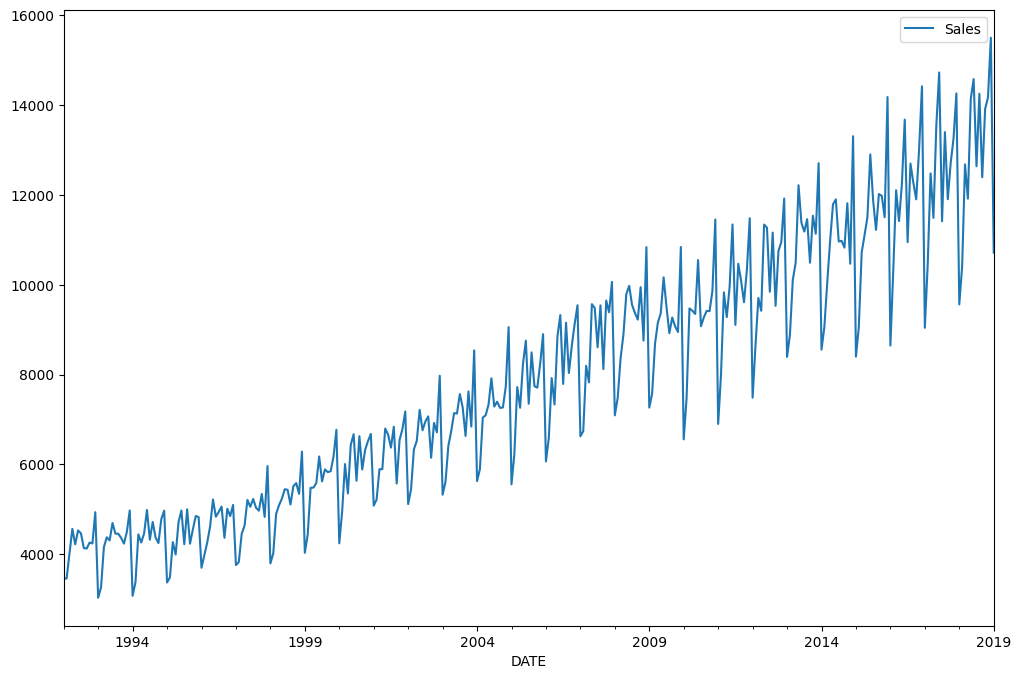

In [20]:
df.plot(figsize=(12,8))

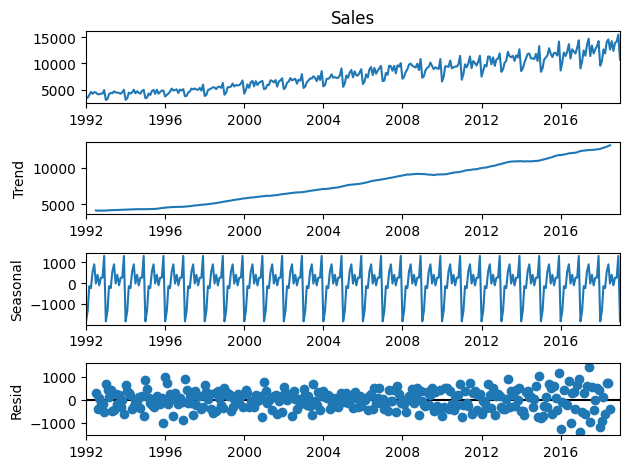

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Sales'])
results.plot();

<AxesSubplot:xlabel='DATE'>

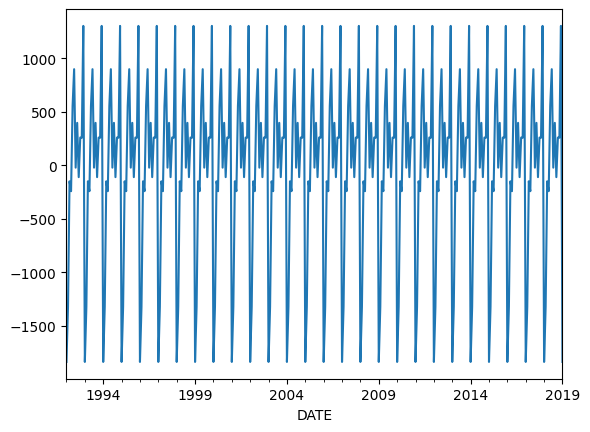

In [23]:
results.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

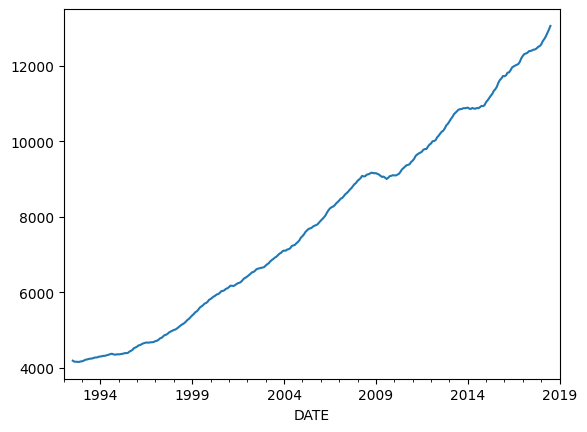

In [24]:
results.trend.plot()

In [25]:
len(df)

325

In [26]:
# train-test split
train = df.iloc[:313]
test = df.iloc[313:]

In [27]:
len(train)

313

In [28]:
len(test)

12

In [29]:
# Normalize data - Simple method
ser = np.array([23,56,2,13,14])

ser.max()   # 56    # fit

# Divide series by max of ser
ser / ser.max()     #Transform

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)    # finds the max value in train data
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [32]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [40]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1

generator = TimeseriesGenerator(data= scaled_train,
                                targets= scaled_train,
                                length=n_input,
                                batch_size=1)

how should we decide the number of inputs here?
If you're dealing with a data set that shows some clear seasonality over the course of a year, then you should probably feed in at least 12 data points in order for the recurrent neural network to be able to pick up on that seasonality.

The larger the number of inputs here, that means you're going to have way more features,
which means you should probably have a larger network and the training data will take or the training time overall will take longer, but hopefully leads to better results.


In [41]:
len(scaled_train)

313

In [42]:
len(generator)

310

In [43]:
generator[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855]]]),
 array([[0.13103684]]))

In [44]:
X,y = generator[0]

In [45]:
X

array([[[0.03658432],
        [0.03649885],
        [0.08299855]]])

In [46]:
y

array([[0.13103684]])

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [48]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(data= scaled_train,
                                targets= scaled_train,
                                length=n_input,
                                batch_size=1)

In [49]:
model = Sequential()

model.add(LSTM(units=150,
               activation='relu',
               input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25


c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


301/301 [==============================] - 3s 5ms/step - loss: 0.0146
Epoch 2/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0090
Epoch 3/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0099
Epoch 4/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0089
Epoch 5/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0064
Epoch 6/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0055
Epoch 7/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0045
Epoch 8/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0037
Epoch 9/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 10/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0019
Epoch 11/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0024
Epoch 12/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 13/25
301/301 [===============

In [52]:
model.history.history.keys()

dict_keys(['loss'])

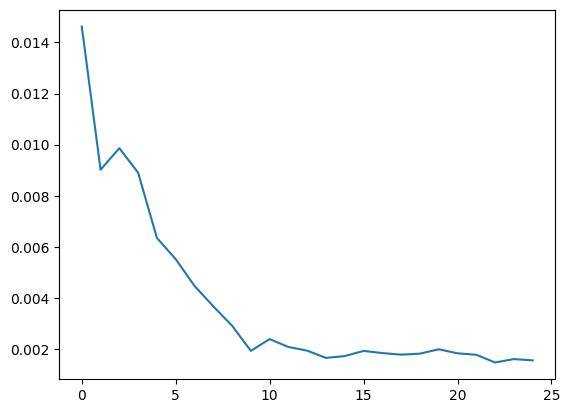

In [53]:
# my_loss = model.history.history['loss']
# plt.plot(range(len(my_loss)),my_loss)
plt.plot(range(len(model.history.history['loss'])),
         model.history.history['loss'])

In [54]:
# 12 history steps --and predict--> step 13
# we need last 12 data points of train --to predict--> data point 1 of test data

In [55]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [56]:
X.shape

(1, 3, 1)

In [59]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))
first_eval_batch


array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [60]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 191ms/step


array([[0.734885]], dtype=float32)

In [62]:
model.predict(first_eval_batch)[0]

1/1 [==============================] - 0s 37ms/step


array([0.734885], dtype=float32)

In [61]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

# Forecast using RNN model

In [ ]:
# hold predictions
test_preds = [] 

# last n_input points from training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to format RNN wants(same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far into the future will we forcast?
# len(test) 12 for now.... --> 24
for i in range(len(test)):

    # One timestep ahead of historical 12 points
    current_preds = model.predict(current_batch)[0]

    # Store that prediction
    test_preds.append(current_preds)

    # Update current batch to include prediction
    current_batch = np.append(current_batch[:,1:,:],
                              [[current_preds]],
                              axis=1)

In [63]:
# hold predictions
test_preds = [] 

# last n_input points from training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to format RNN wants(same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

In [66]:
my_first_pred = model.predict(current_batch)[0]
my_first_pred

1/1 [==============================] - 0s 30ms/step


array([0.734885], dtype=float32)

In [65]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [68]:
current_batch.shape

(1, 12, 1)

In [69]:
current_batch[:,1:,:]

array([[[0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [71]:
current_batch[:,1:,:].shape

(1, 11, 1)

In [72]:
# add prediction variable to current batch and remove first value from current batch
# sort of replace and keep len same

np.append(current_batch[:,1:,:],
                              [[my_first_pred]],
                              axis=1)


array([[[0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ],
        [0.73488498]]])

In [73]:
my_first_pred

array([0.734885], dtype=float32)

In [74]:
# hold predictions
test_preds = [] 

# last n_input points from training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to format RNN wants(same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far into the future will we forcast?
# len(test) 12 for now.... --> 24
for i in range(len(test)):

    # One timestep ahead of historical 12 points
    current_preds = model.predict(current_batch)[0]

    # Store that prediction
    test_preds.append(current_preds)

    # Update current batch to include prediction
    current_batch = np.append(current_batch[:,1:,:],
                              [[current_preds]],
                              axis=1)

1/1 [==============================] - 0s 32ms/step


In [75]:
test_preds

[array([0.734885], dtype=float32),
 array([0.83267665], dtype=float32),
 array([0.813601], dtype=float32),
 array([0.97047365], dtype=float32),
 array([1.0173736], dtype=float32),
 array([0.80644155], dtype=float32),
 array([0.923049], dtype=float32),
 array([0.81883407], dtype=float32),
 array([0.8908267], dtype=float32),
 array([0.93889654], dtype=float32),
 array([0.98367107], dtype=float32),
 array([0.6515045], dtype=float32)]

In [76]:
# Invert scaling
true_preds = scaler.inverse_transform(test_preds)
true_preds

array([[11628.41934991],
       [12772.48411775],
       [12549.31829786],
       [14384.57119763],
       [14933.25330019],
       [12465.55964065],
       [13829.7499361 ],
       [12610.53974271],
       [13452.78158808],
       [14015.15058434],
       [14538.96783793],
       [10652.95133972]])

In [79]:
test['Predictions'] = true_preds
test

c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales,Predictions
DATE,,
2018-02-01,10415,11628.419350
2018-03-01,12683,12772.484118
2018-04-01,11919,12549.318298
2018-05-01,14138,14384.571198
2018-06-01,14583,14933.253300
2018-07-01,12640,12465.559641
2018-08-01,14257,13829.749936
2018-09-01,12396,12610.539743
2018-10-01,13914,13452.781588


<AxesSubplot:xlabel='DATE'>

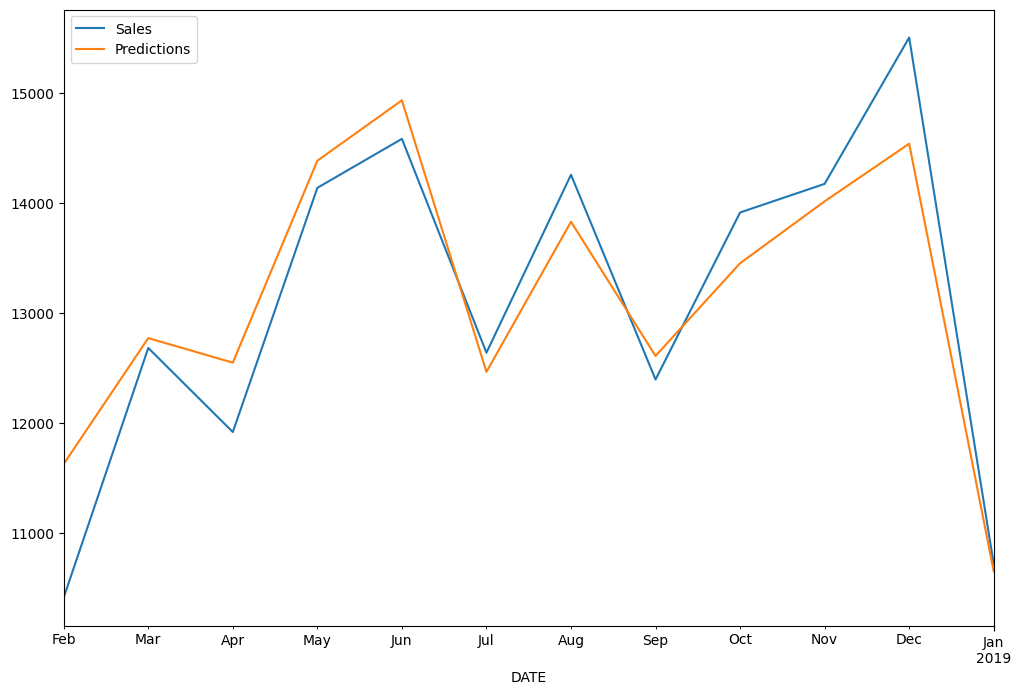

In [80]:
test.plot(figsize=(12,8))

In [81]:
model.save('mycoolmode.h5')

In [82]:
# Load model
from keras.models import load_model

new_model = load_model('mycoolmode.h5')

In [83]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [86]:
# hold predictions
test_preds = [] 

# last n_input points from training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to format RNN wants(same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far into the future will we forcast?
# len(test) 12 for now.... --> 50
for i in range(50):

    # One timestep ahead of historical 12 points
    current_preds = new_model.predict(current_batch)[0]

    # Store that prediction
    test_preds.append(current_preds)

    # Update current batch to include prediction
    current_batch = np.append(current_batch[:,1:,:],
                              [[current_preds]],
                              axis=1)

1/1 [==============================] - 0s 21ms/step


In [87]:
test_preds

[array([0.734885], dtype=float32),
 array([0.83267665], dtype=float32),
 array([0.813601], dtype=float32),
 array([0.97047365], dtype=float32),
 array([1.0173736], dtype=float32),
 array([0.80644155], dtype=float32),
 array([0.923049], dtype=float32),
 array([0.81883407], dtype=float32),
 array([0.8908267], dtype=float32),
 array([0.93889654], dtype=float32),
 array([0.98367107], dtype=float32),
 array([0.6515045], dtype=float32),
 array([0.8148663], dtype=float32),
 array([0.8699297], dtype=float32),
 array([0.90158415], dtype=float32),
 array([1.0216411], dtype=float32),
 array([1.0354953], dtype=float32),
 array([0.8814796], dtype=float32),
 array([0.9583291], dtype=float32),
 array([0.8810669], dtype=float32),
 array([0.9537208], dtype=float32),
 array([0.9898099], dtype=float32),
 array([1.0061768], dtype=float32),
 array([0.7434294], dtype=float32),
 array([0.88332534], dtype=float32),
 array([0.9178325], dtype=float32),
 array([0.97973335], dtype=float32),
 array([1.060422], dty

# Multivariate Time Series with RNN

Multivariate Time Series
    - Change input shape in LSTM layer to reflect 2-D structure
    - Final Dense layer should have a neuron per feature/variable

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DATA/energydata_complete.csv',index_col='date',
                infer_datetime_format=True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<AxesSubplot:xlabel='date'>

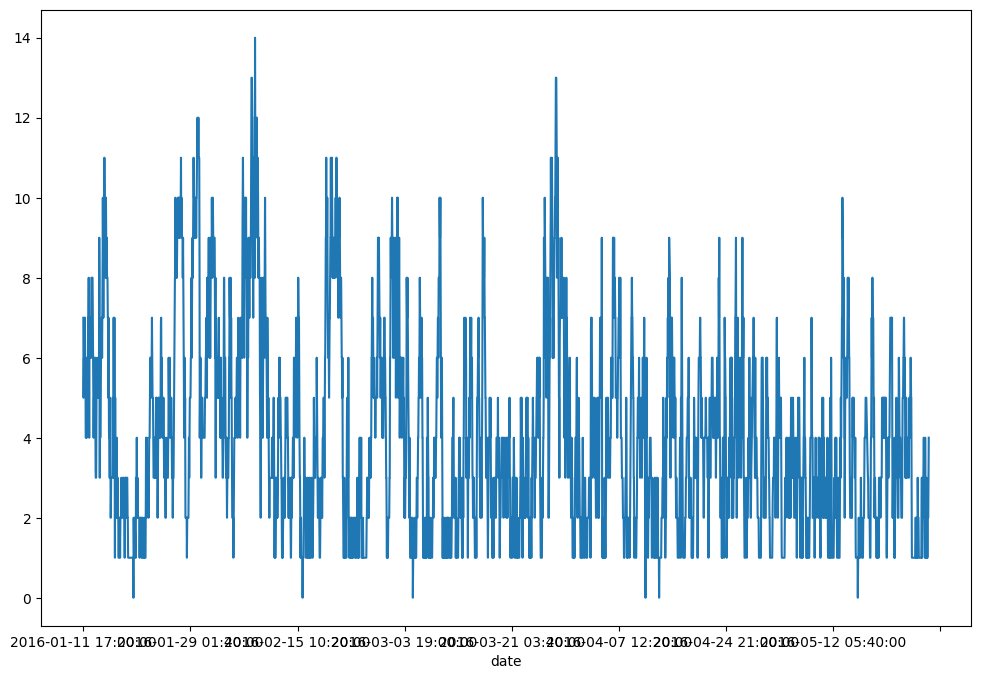

In [5]:
df['Windspeed'].plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

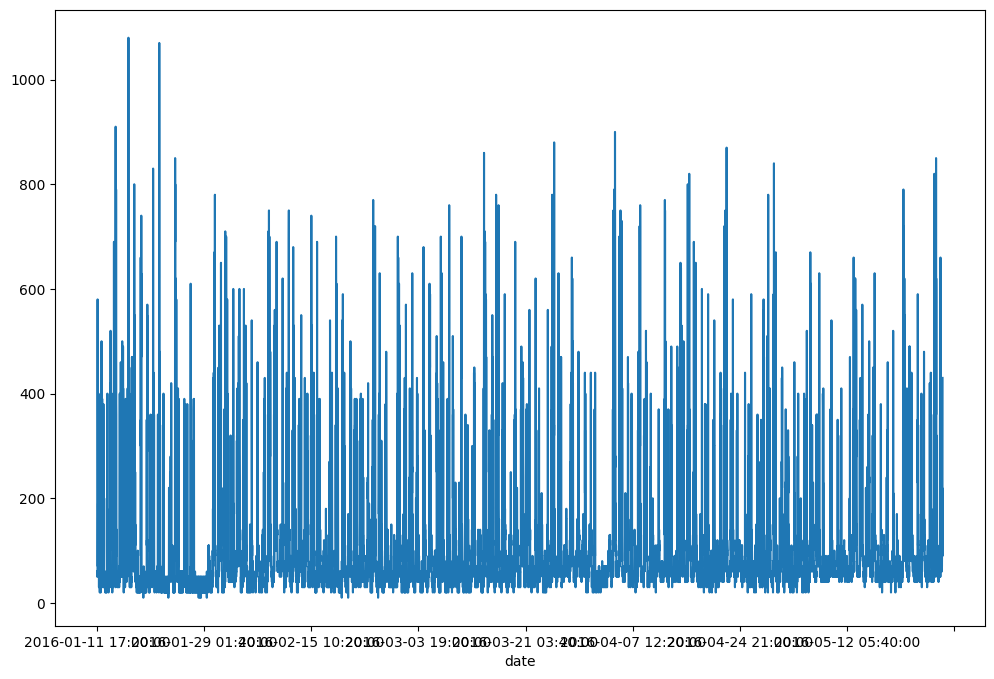

In [6]:
df['Appliances'].plot(figsize=(12,8))

## Train Test Split

In [7]:
len(df)

19735

Let's imagine we want to predict just 24 hours into the future, we don't need 3 months of data for that, so let's save some training time and only select the last months data.

In [8]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [9]:
df = df.loc['2016-05-01':]

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [10]:
df = df.round(2)

In [11]:
len(df)

3853

In [12]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [13]:
test_days = 2

In [14]:
test_ind = test_days*144

In [15]:
test_ind

288

In [16]:
# Notice the minus sign in our indexing

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [17]:
train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [18]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


## Scale Data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [22]:
len(scaled_train)

3565

In [23]:
len(generator) 

3421

In [24]:
# What does the first batch look like?
X,y = generator[0]

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [27]:
scaled_train.shape

(3565, 28)

In [28]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


## EarlyStopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [31]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


3421/3421 [==============================] - 132s 38ms/step - loss: 0.0115 - val_loss: 0.0107
Epoch 2/10
3421/3421 [==============================] - 144s 42ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 3/10
3421/3421 [==============================] - 135s 39ms/step - loss: 0.0075 - val_loss: 0.0083
Epoch 4/10
3421/3421 [==============================] - 124s 36ms/step - loss: 0.0073 - val_loss: 0.0080
Epoch 5/10
3421/3421 [==============================] - 133s 39ms/step - loss: 0.0072 - val_loss: 0.0081


In [32]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

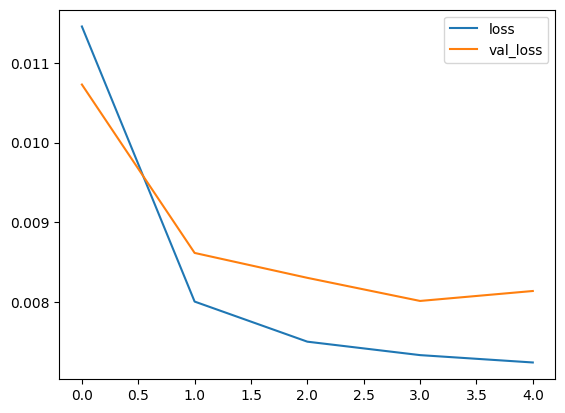

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [34]:
first_eval_batch = scaled_train[-length:]

In [35]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [36]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [37]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 394ms/step


array([[0.11787321, 0.00175121, 0.69231576, 0.3974768 , 0.5407714 ,
        0.43974006, 0.4225938 , 0.4110287 , 0.7133573 , 0.4050996 ,
        0.30156374, 0.36183986, 0.65382063, 0.01791704, 0.6031243 ,
        0.40130144, 0.5429903 , 0.3097911 , 0.56806076, 0.3701343 ,
        0.611547  , 0.5560398 , 0.41562653, 0.21164966, 0.60485667,
        0.5013429 , 0.48568916, 0.4891328 ]], dtype=float32)

In [38]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [39]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [40]:
test_predictions

[array([0.11787321, 0.00175121, 0.69231576, 0.3974768 , 0.5407714 ,
        0.43974006, 0.4225938 , 0.4110287 , 0.7133573 , 0.4050996 ,
        0.30156374, 0.36183986, 0.65382063, 0.01791704, 0.6031243 ,
        0.40130144, 0.5429903 , 0.3097911 , 0.56806076, 0.3701343 ,
        0.611547  , 0.5560398 , 0.41562653, 0.21164966, 0.60485667,
        0.5013429 , 0.48568916, 0.4891328 ], dtype=float32),
 array([ 1.15606040e-01, -1.15938485e-04,  6.85909212e-01,  3.99413675e-01,
         5.36829114e-01,  4.44698632e-01,  4.17533875e-01,  3.98358643e-01,
         7.09026098e-01,  3.99193138e-01,  3.08110863e-01,  3.51279110e-01,
         6.34195864e-01,  4.99588847e-02,  5.98662198e-01,  3.98301929e-01,
         5.57880163e-01,  2.99054205e-01,  5.75955749e-01,  3.79868329e-01,
         6.02561772e-01,  5.86495697e-01,  4.08129871e-01,  2.18292683e-01,
         6.21777833e-01,  4.79159236e-01,  4.87416118e-01,  4.91862714e-01],
       dtype=float32),
 array([ 1.1460848e-01, -1.2760982e-04,  6.

In [41]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

## Inverse Transformations and Compare

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
true_predictions

array([[ 1.10762369e+02,  5.25364280e-02,  2.44538935e+01, ...,
         7.07269489e+00,  2.42798875e+01,  2.44519656e+01],
       [ 1.09016651e+02, -3.47815454e-03,  2.44162871e+01, ...,
         6.69779109e+00,  2.43661834e+01,  2.45883798e+01],
       [ 1.08248531e+02, -3.82829458e-03,  2.43673316e+01, ...,
         6.28113746e+00,  2.45974224e+01,  2.47891299e+01],
       ...,
       [-8.56926133e+01, -3.48341770e+00,  2.51617314e+01, ...,
        -8.14370824e+00,  2.57932230e+01,  2.25804230e+01],
       [-8.56926592e+01, -3.48341949e+00,  2.51617328e+01, ...,
        -8.14370924e+00,  2.57932290e+01,  2.25804260e+01],
       [-8.56927051e+01, -3.48341770e+00,  2.51617332e+01, ...,
        -8.14370622e+00,  2.57932290e+01,  2.25804215e+01]])

In [44]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [45]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [46]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,110.762369,0.052536,24.453893,38.010233,24.133420,35.248458,25.117320,36.546663,24.193501,37.648395,...,22.167528,37.878213,16.621747,756.777708,55.587616,2.116497,41.291400,7.072695,24.279887,24.451966
1,109.016651,-0.003478,24.416287,38.063788,24.084259,35.415215,25.081192,36.306946,24.163183,37.518217,...,22.210161,38.089344,16.402507,757.472102,55.017870,2.182927,42.306670,6.697791,24.366183,24.588380
2,108.248531,-0.003828,24.367332,38.083341,24.021119,35.529423,25.051797,36.101769,24.140439,37.436303,...,22.257793,38.324283,16.182221,758.181940,54.451413,2.265076,43.092196,6.281137,24.597422,24.789130
3,107.974075,0.036765,24.310001,38.086269,23.943192,35.592271,25.020062,35.919253,24.105036,37.349835,...,22.300970,38.558096,15.927075,758.846599,53.900127,2.339567,43.622926,5.865379,24.744541,24.942626
4,108.195349,0.098891,24.251272,38.081299,23.863751,35.652722,24.986143,35.761408,24.067997,37.266761,...,22.344036,38.787378,15.651534,759.488270,53.472205,2.404245,43.963681,5.458617,24.886565,25.088237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-85.692556,-3.483412,25.161731,13.386753,34.589531,2.332501,31.347810,40.306113,23.769341,20.740569,...,29.552665,24.157018,42.309521,750.146411,-7.147545,8.860576,55.171993,-8.143703,25.793223,22.580425
284,-85.692590,-3.483415,25.161731,13.386746,34.589531,2.332503,31.347810,40.306113,23.769341,20.740568,...,29.552666,24.157020,42.309524,750.146412,-7.147545,8.860576,55.171996,-8.143705,25.793223,22.580423
285,-85.692613,-3.483418,25.161731,13.386753,34.589526,2.332505,31.347811,40.306113,23.769340,20.740567,...,29.552666,24.157022,42.309515,750.146412,-7.147554,8.860577,55.172004,-8.143708,25.793223,22.580423
286,-85.692659,-3.483419,25.161733,13.386746,34.589529,2.332511,31.347810,40.306111,23.769341,20.740564,...,29.552666,24.157022,42.309518,750.146412,-7.147549,8.860579,55.172011,-8.143709,25.793229,22.580426


## EXTRA:
### Our Saved Model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save("multivariate.h5")